## Static evolution

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numba import njit, prange
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import pickle

from IPython.display import HTML
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.manifold import MDS
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec

plt.rcParams.update({"font.size": 16})

import helper

In [18]:
#Parameters
pop_size = 1000
grn_size = 22
num_cells = 22
dev_steps = 22
geneid = 1

rule = 90
seed_int = 1024

pop = np.random.randn(pop_size, grn_size+2, grn_size).astype(np.float64)
targets, phenos, fitnesses = helper.get_pop_TPF(pop, pop_size, num_cells, grn_size, dev_steps, geneid, rule, seed_int)

#pickle.dump(phenos, open("random_phenos.p", "wb" ) )
#phenos = pickle.load(open("random_phenos.p", "rb"))

#### Final fitness

In [20]:
max_fits = pickle.load(open("static_max_fits_all256.p", "rb"))
#256 rules, 5 reps, 1000 generations
evolved_mean=np.mean(np.array(max_fits)[:,:,-1],axis=1) #average final fitness of 5 reps
evolved_std=np.std(np.array(max_fits)[:,:,-1],axis=1) #average final fitness of 5 reps

rules=list(range(0,256))
fits=[]
for rule in rules:
    targets, calc_phenos, calc_fitnesses = helper.get_pop_TPF(pop, pop_size, num_cells, grn_size, dev_steps, geneid, rule, seed_int)
    fits.append(calc_fitnesses)
rand_ave=np.mean(np.array(fits),axis=1)
rand_max=np.max(np.array(fits),axis=1)
rand_std=np.std(np.array(fits),axis=1)

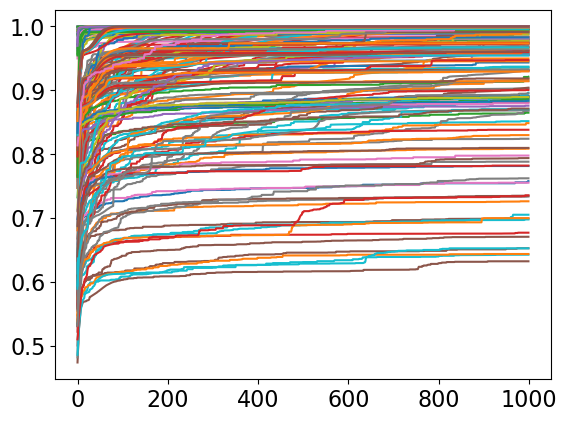

In [30]:
ave_max=np.mean(np.array(max_fits),axis=1)
plt.plot(ave_max.T)

/Users/csengepetak/miniconda3/envs/grnenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/csengepetak/miniconda3/envs/grnenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


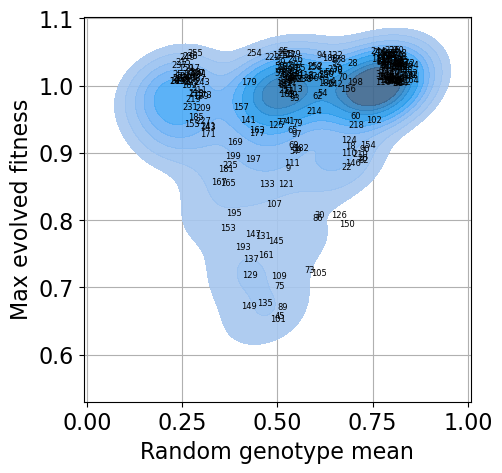

In [6]:
plt.figure(figsize=(5,5))
#plt.scatter(rand_ave,evolved_mean)
sns.kdeplot(x=rand_ave,y=evolved_mean, fill=True, zorder=3, alpha=0.9)
for i,(x,y) in enumerate(zip(rand_ave,evolved_mean)):
    S = 20
    plt.text(x + np.random.rand()/S,y + np.random.rand()/S,f"{i}", fontsize=6)
plt.grid(zorder=0)
plt.ylabel("Max evolved fitness")
plt.xlabel("Random genotype mean")
#slope, intercept = np.polyfit(evolved, rand_ave, 1)
#plt.plot(evolved, slope*evolved + intercept, color='red', label='Line of Best Fit')
plt.show()

Text(0, 0.5, 'Std of max fits between replicates')

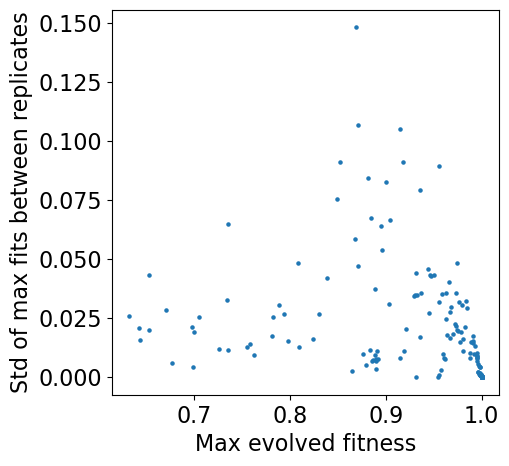

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(evolved_mean,evolved_std, s=5)
plt.xlabel("Max evolved fitness")
plt.ylabel("Std of max fits between replicates")

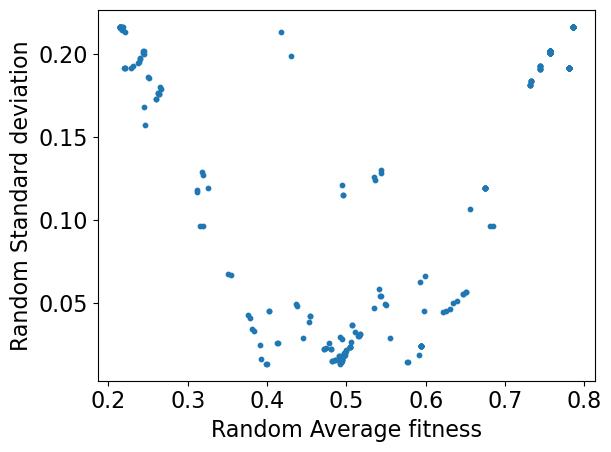

In [8]:
plt.scatter(rand_ave,rand_std,s=10)
plt.xlabel("Random Average fitness")
plt.ylabel("Random Standard deviation")
#plt.xlim(0,1)
plt.tight_layout()

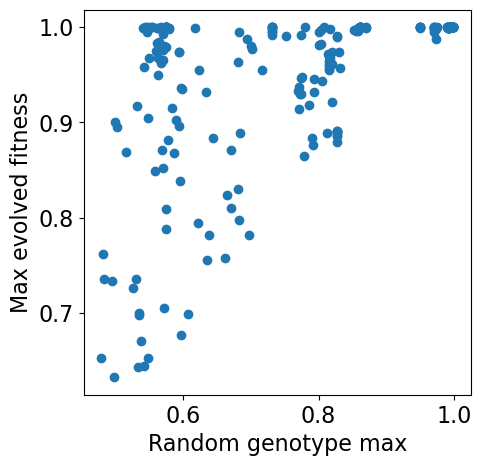

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(rand_max,evolved_mean)
plt.ylabel("Max evolved fitness")
plt.xlabel("Random genotype max")

slope, intercept = np.polyfit(evolved_mean, rand_max, 1)
#plt.plot(evolved, slope*evolved + intercept, color='red', label='Line of Best Fit')
plt.show()

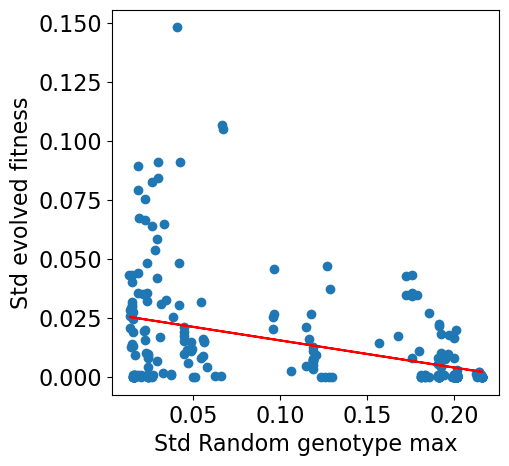

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(rand_std,evolved_std)
plt.ylabel("Std evolved fitness")
plt.xlabel("Std Random genotype max")

slope, intercept = np.polyfit(rand_std, evolved_std, 1)
plt.plot(rand_std, slope*rand_std + intercept, color='red', label='Line of Best Fit')
plt.show()

### Temporal behaviour

/var/folders/41/13rhly317ygcfk0c_1jggxch0000gn/T/ipykernel_44257/3520239434.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(new_labels)


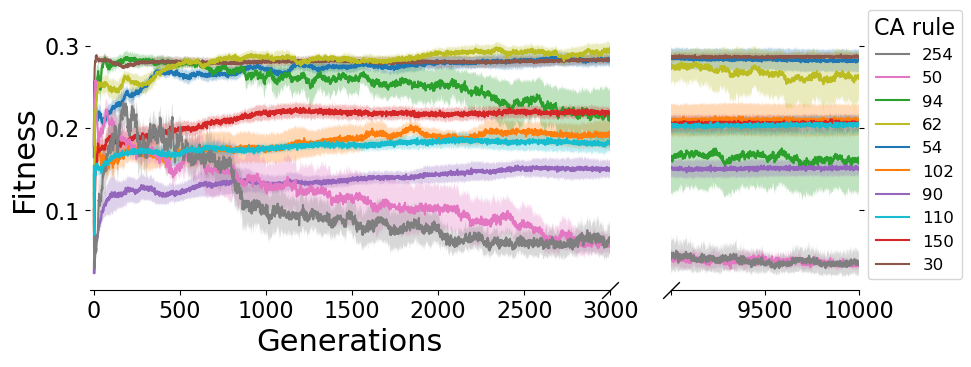

In [11]:
#max_fits = pickle.load(open("static_max_fits.p", "rb"))
#max_fits = pickle.load(open("static_ave_fits.p", "rb"))
max_fits = pickle.load(open("static_kidstds.p", "rb"))



rules=[54,102,94,150,90,30,50,254,62,110]
rule_order=[254,50,94,62,54,102,90,110,150,30]
order=[]
for i in rule_order:
    j=np.where(np.array(rules) == i)[0][0]
    order.append(j)

fig = plt.figure(figsize=(10, 4))
# fig = plt.figure(layout="constrained")
gs = GridSpec(1, 10, figure=fig)
ax1 = fig.add_subplot(gs[0, :7])
ax2 = fig.add_subplot(gs[0, 7:])

for idx, data in enumerate(max_fits):
    # Calculate mean and standard error for each list
    mean1 = np.mean(data, axis=0)
    stderr1 = np.std(data, axis=0) / np.sqrt(len(data))

    ax1.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
    ax2.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)

    # plot the same data on both axes
    ax1.plot(mean1, "-", color=f"C{idx}", label=rules[idx])
    ax2.plot(mean1, "-", color=f"C{idx}", label=rules[idx])


# Get handles and labels from the current axes
handles, labels = plt.gca().get_legend_handles_labels()

# Reorder handles and labels
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]

ax1.set_xlim(-25, 3_000)
ax2.set_xlim(9_000, 10_000)
#ax1.set_ylim(0.6, 1.01)
#ax2.set_ylim(0.6, 1.01)

ax1.yaxis.tick_left()
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.left.set_visible(False)

ax2.yaxis.tick_right()
ax2.spines.left.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.set_yticklabels([])

# hide the first xtick of ax2, it's too close to the last of ax1
new_labels = [ticklabel.get_text() for ticklabel in ax2.get_xticklabels()]
new_labels[0] = ""
ax2.set_xticklabels(new_labels)

# Add labels and legend
ax1.set_xlabel("Generations",fontsize=22)
ax1.set_ylabel("Fitness",fontsize=22)

# ax1.legend(title="CA rule", fontsize=10)
#ax2.legend(title="CA rule", fontsize=12, loc="lower center")
plt.rcParams['legend.title_fontsize'] = 16
ax2.legend(handles, labels,title="CA rule",fontsize=12, bbox_to_anchor=(1, 1.1))

d = 1.0  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)],
    markersize=12,
    linestyle="none",
    color="k",
    mec="k",
    mew=1,
    clip_on=False,
)
ax1.plot([1], [0], transform=ax1.transAxes, **kwargs)
ax2.plot([0], [0], transform=ax2.transAxes, **kwargs)

plt.tight_layout()
#plt.savefig("figs/max_fits_10rules.pdf")
plt.show()

### Evolved GRNs
Networks, generalisability for rule

In [34]:
#GET GRNS for rule 94
rule=94
grns=[]
for i in range(5):
    fname="final_results_all/stats_one_hot_seeded_0_100000_" + str(rule) + "_" + str(0) + "_" + str(i+1)
    f=np.loadtxt(fname + "_best_grn.txt")
    num_generations=int(f.shape[0]/(grn_size+2)/grn_size)
    f=f.reshape(num_generations,grn_size+2,grn_size)
    grn=f[-1,:,:] #last generation
    grns.append(grn)

In [40]:
pop=np.array(grns)
targets=[]
phenos=[]
fits = []
seedints = [1024,69904,149796,4147842,1238860,2481300]
for seed_int in seedints:
    t, p, f = helper.get_pop_TPF(pop, 5, num_cells, grn_size, dev_steps, geneid, rule, seed_int)
    targets.append(t)
    phenos.append(p)
    fits.append(f)

targets=np.array(targets)
phenos=np.array(phenos)
fits=np.array(fits)

In [44]:
fits

array([[0.97933884, 1.        , 0.99986771, 0.97933884, 1.        ],
       [0.98553719, 0.88016529, 0.88837481, 0.98553719, 0.76239669],
       [0.48232237, 0.49586777, 0.49584667, 0.53719008, 0.49586777],
       [0.57207681, 0.29338818, 0.21279485, 0.54338843, 0.3822314 ],
       [0.67537902, 0.433918  , 0.43801189, 0.54545454, 0.52272727],
       [0.77203354, 0.49383535, 0.40702491, 0.50413223, 0.51033058]])

In [54]:
df = pd.DataFrame(fits.T, columns=["1 seed","4 seed", "6 seed", "random 1", "random 2", "random 3"])
df

,1 seed,4 seed,6 seed,random 1,random 2,random 3
0,0.979339,0.985537,0.482322,0.572077,0.675379,0.772034
1,1.000000,0.880165,0.495868,0.293388,0.433918,0.493835
2,0.999868,0.888375,0.495847,0.212795,0.438012,0.407025
3,0.979339,0.985537,0.537190,0.543388,0.545455,0.504132
4,1.000000,0.762397,0.495868,0.382231,0.522727,0.510331


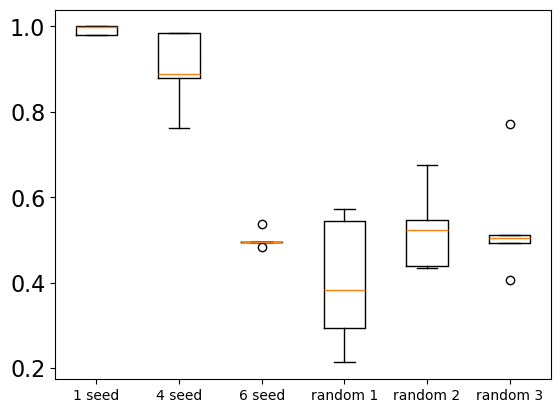

In [56]:
plt.boxplot([df[column] for column in df.columns], labels=df.columns)
plt.xticks(fontsize=10)
plt.show()


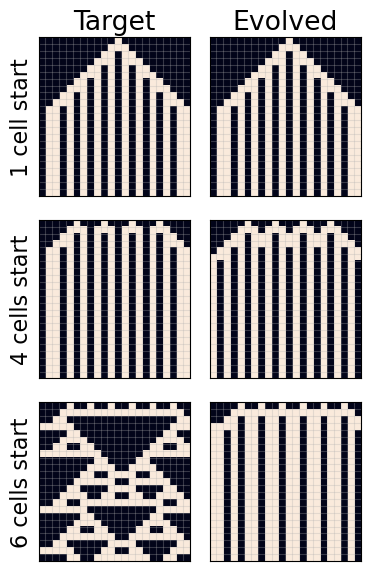

In [51]:
nrows = 3
ncols = 2
scale=2

id=1 #replicate id to plot, 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * scale, nrows*scale), sharex=True, sharey=True)
axs = axs.flatten()

counter=0
for i, ax in enumerate(axs):
    if i % 2 == 0:
        helper.imshow_ca(targets[counter],ax=ax)
    else:
        helper.imshow_ca(phenos[counter,id,:,:],ax=ax)
        counter+=1
    #ax.set_title(f"Rule: {rules[i]}", fontsize=16)

for ax, col in zip(axs, ["Target","Evolved"]):
    ax.set_title(col)

axs[0].set_ylabel("1 cell start")
axs[2].set_ylabel("4 cells start")
axs[4].set_ylabel("6 cells start")

plt.tight_layout()
#plt.savefig("figs/94_general.png")

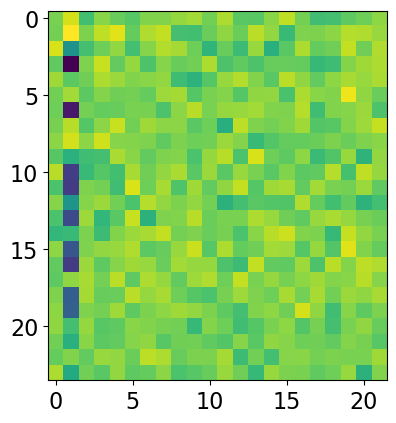

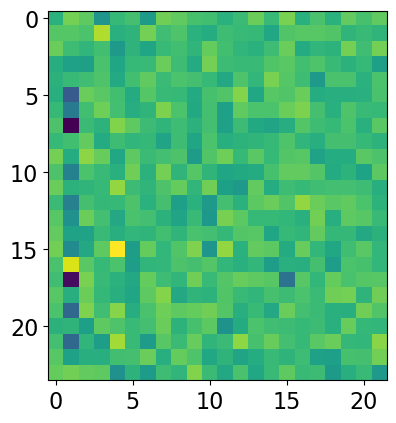

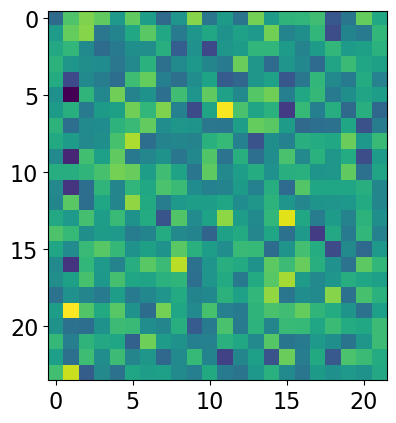

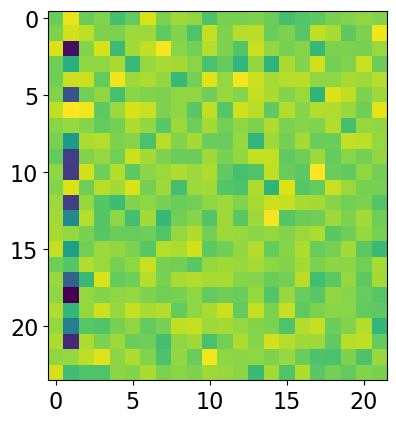

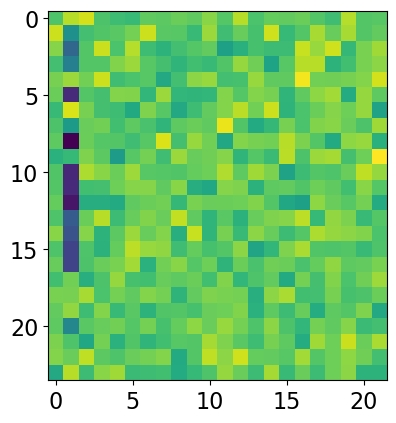

In [60]:
for p in pop:
    plt.imshow(p)
    plt.show()

### Illustrative

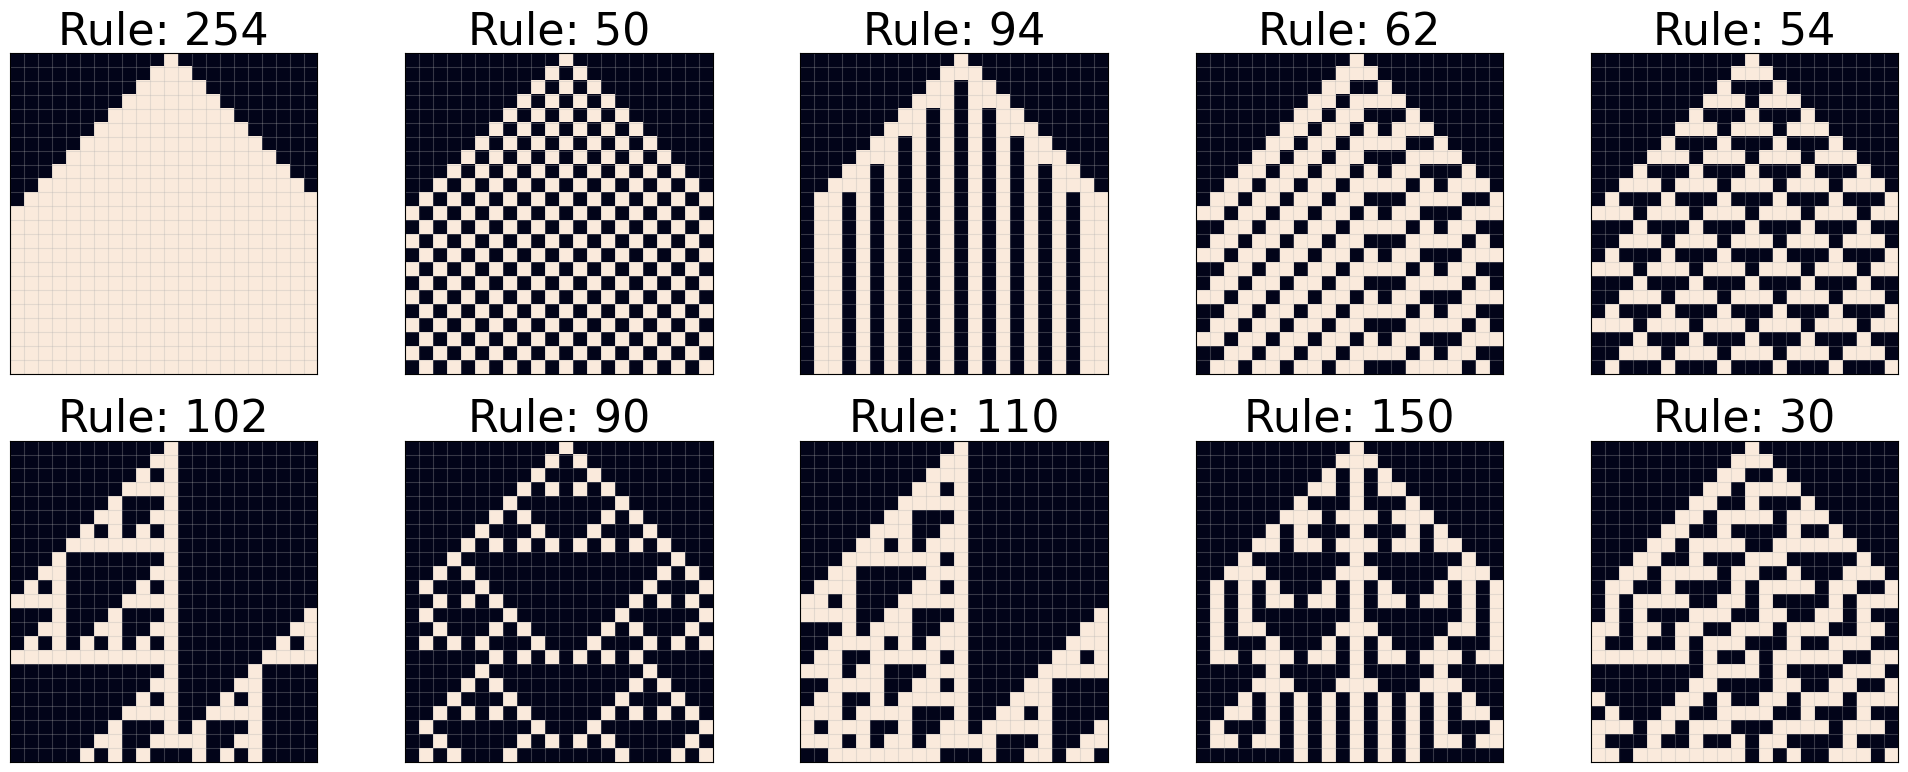

In [16]:
rule_order=[254,50,94,62,54,102,90,110,150,30]
seedint = 1024
targets=[]
for r in rule_order:
    start_pattern = helper.seedID2string(seedint, num_cells)
    targets.append(helper.rule2targets_wrapped_wstart(int(r), L=dev_steps+1, N=num_cells, start_pattern=start_pattern))

nrows = 2
ncols = 5
scale=4

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * scale, nrows*scale), sharex=True, sharey=True)
axs = axs.flatten()

for i, ax in enumerate(axs):
    ca = targets[i]
    rule = rule_order[i]
    helper.imshow_ca(ca,ax=ax)
    ax.set_title(f"Rule: {rule}", fontsize=32)

plt.tight_layout()